This script uses mesh_generation ipython script to generate mesh with varying upper layer. The layer is varying according to rules assigned in 'dz_layer1' function. For 1Dcolumn I am using the thickest organic layer which is 50cm. 

In [1]:
import sys,os

sys.path.append(os.path.join(os.environ['ATS_DEV'],'tools','meshing_ats'))
import meshing_ats

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 1 km long hillslope, 10% slope
x = np.linspace(0,1000,101)
z = np.linspace(100,0,101)
print x, z
print len(x),len(z)
m2 = meshing_ats.Mesh2D.from_Transect(x,z)

[    0.    10.    20.    30.    40.    50.    60.    70.    80.    90.
   100.   110.   120.   130.   140.   150.   160.   170.   180.   190.
   200.   210.   220.   230.   240.   250.   260.   270.   280.   290.
   300.   310.   320.   330.   340.   350.   360.   370.   380.   390.
   400.   410.   420.   430.   440.   450.   460.   470.   480.   490.
   500.   510.   520.   530.   540.   550.   560.   570.   580.   590.
   600.   610.   620.   630.   640.   650.   660.   670.   680.   690.
   700.   710.   720.   730.   740.   750.   760.   770.   780.   790.
   800.   810.   820.   830.   840.   850.   860.   870.   880.   890.
   900.   910.   920.   930.   940.   950.   960.   970.   980.   990.
  1000.] [ 100.   99.   98.   97.   96.   95.   94.   93.   92.   91.   90.   89.
   88.   87.   86.   85.   84.   83.   82.   81.   80.   79.   78.   77.
   76.   75.   74.   73.   72.   71.   70.   69.   68.   67.   66.   65.
   64.   63.   62.   61.   60.   59.   58.   57.   56.   55.  

In [3]:
#Changing organic layer thickness 
def dz_layer1(s):
    if s<100:
        thickness=0.5
    elif ((100<=s)&(s<=200)):
        thickness=-0.0045*s+0.95
    elif ((200<s)&(s<800)):
        thickness=0.05
    elif ((800<=s)&(s<=900)):
        thickness=0.0025*s-1.95
    else:
        thickness=0.3
    return thickness

202 (202,)
[ 0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.455  0.41   0.365  0.32   0.275  0.23   0.185  0.14   0.095  0.05   0.05
  0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
  0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
  0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
  0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
  0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
  0.05   0.05   0.05   0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.3    0.3    0.3    0.3    0.3    0.3    0.3    0.3
  0.3    0.3  ]


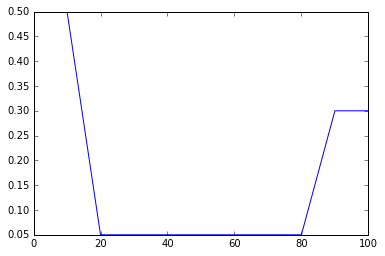

In [4]:
dzs_org_layer = np.array([dz_layer1(x) for x in m2.coords[:,0]])
print len(dzs_org_layer), np.shape(dzs_org_layer)
plt.plot( dzs_org_layer[0:101]);
print dzs_org_layer[0:101]

In [5]:
# layer extrusion for 2D
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

layer_types.append('node') #organic
layer_data.append(dzs_org_layer)
layer_ncells.append(7)
layer_mat_ids.append(1001)

layer_types.append('constant') #mineral
layer_data.append(0.4)
layer_ncells.append(20)
layer_mat_ids.append(1002)

dz = .02
for i in range(15):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
        
for i in range(5):
    dz *= 2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(101)
    
layer_types.append('node')
layer_data.append(45 - sum(layer_data))
layer_ncells.append(2)
layer_mat_ids.append(101)

#print layer_data
#print np.array([layer_data, np.cumsum(np.array(layer_data)), layer_mat_ids]).transpose()
#print layer_mat_ids
#print len(layer_mat_ids)
#print sum(layer_ncells)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types,layer_data, layer_ncells, layer_mat_ids)
m3.write_exodus("hillslope_organic.exo")



You are using exodus.py v 1.04 (beta-cmake), a python wrapper of some of the exodus II library.
Copyright (c) 2013, 2014, 2015, 2016 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: hillslope_organic.exo
Closing exodus file: hillslope_organic.exo


In [6]:
x = np.array([0,1])
z = np.array([0,0])

# layer extrusion for 1D
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

layer_types.append('constant') #organic
layer_data.append(0.5)
layer_ncells.append(7)
layer_mat_ids.append(1001)

layer_types.append('constant') #mineral
layer_data.append(0.4)
layer_ncells.append(20)
layer_mat_ids.append(1002)

dz = .02
for i in range(15):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
        
for i in range(5):
    dz *= 2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(101)
    
layer_types.append('constant')
layer_data.append(45 - sum(layer_data))
layer_ncells.append(2)
layer_mat_ids.append(101)
m2 = meshing_ats.Mesh2D.from_Transect(x,z)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                       layer_data, 
                                      layer_ncells, 
                                     layer_mat_ids)
m3.write_exodus("hillslope_organic_column.exo")


You are using exodus.py v 1.04 (beta-cmake), a python wrapper of some of the exodus II library.
Copyright (c) 2013, 2014, 2015, 2016 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: hillslope_organic_column.exo
Closing exodus file: hillslope_organic_column.exo


In [6]:
meshing_ats.Mesh3D.extruded_Mesh2D?
